<a href="https://colab.research.google.com/github/ceska68/Atividades/blob/main/Volvo_Bastien.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Volvo (nome do grupo)

Estimativa de Valores de Horímetro das Máquinas da frota circulante

**Drive**: https://drive.google.com/drive/folders/1HS80lS_XzGH7Tz9juk08d2IR65zZ4Cyv

**Trello**: 

**Github**:

## 0 - Informações sobre o projeto (contexto)

## 1 - Import libs

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from ipywidgets import interact

## 2 - Read data

In [ ]:
# Read data
table_equipments = pd.read_excel('23w06_Equipamentos.xlsx')
table_time_series  = pd.read_excel('23w06_SeriesTemporais_Horimetros.xlsx', header=3)



In [ ]:
# Read table_equipments
table_equipments.head()

,Região,País,Dealer,Segmento,Modelo,Chassis ID,PIN17,Delivery Date,Obs.:,Estado,Região.1
0,Hispânico Sul,Argentina,EPSA,Mining,ART,A040F320538,VCEA040FCG0320538,2020-11-26,NaN,San Luis,Argentina
1,Hispânico Sul,Argentina,EPSA,Construction,ART,A30G732052,VCE0A30GCL0732052,2020-06-22,NaN,San Juan,Argentina
2,Hispânico Sul,Argentina,EPSA,Mining,ART,A30G732029,NaN,2019-11-27,Não encontramos com os métodos de pesquisa uti...,Entre Ríos,Argentina
3,Hispânico Sul,Argentina,EPSA,Mining,EXC,EC210282764,VCEC210DH00282764,2019-06-06,NaN,0,Argentina
4,Hispânico Sul,Argentina,EPSA,Forestry,EXC,EC210282811,VCEC210DV00282811,2019-09-13,Não encontramos com os métodos de pesquisa uti...,0,Argentina


In [ ]:
# Read table_time_series
table_time_series.head()

,Unnamed: 0,Chassis Id*,Machine History Date Day,Compensated Working Hours By Day
0,NaN,A030F720057,2016-12-09,0.00
1,NaN,A030F720057,2016-12-10,5.75
2,NaN,A030F720057,2016-12-11,8.95
3,NaN,A030F720057,2016-12-12,1.60
4,NaN,A030F720057,2016-12-13,8.20


In [ ]:
# Rename columns
table_equipments.rename(columns = {'Chassis ID' : 'ID'}, inplace = True)
table_time_series.rename(columns = {'Chassis Id*' : 'ID',
                        'Machine History Date Day' : 'Day',
                        'Compensated Working Hours By Day': 'Time' }, inplace = True)

# Drop columns
table_time_series.drop('Unnamed: 0', axis = 1,inplace = True)

## 3 - Business Understanding / Data understanding

### Hipóteses

* H0: É possível prever o horímetro da máquina com base no historico de resgistros com
precisão significativamente maior que a fornecida pelo cálculo atual (baseado em médias)

* H1: É possivel utilizar a mesma técnica para os 3 cenários de medição do problema:
Máquinas que enviaram dados nos últimos 4 dias; máquinas que enviaram dados mas não
recententemente; máquinas que nunca enviaram dados.

* H2: A técnica proposta garante resultados independentemente da classe da máquina:
AHL; WL; EXC

* H3: A técnica proposta garante resultados independentemente do segmento de aplicação
da máquina.

* H4: A técnica proposta garante resultados independentemente do país onde a máquina
está localizada

* H5: A técnica proposta garante resultados independentemente do Dealer que realizou a
venda

* H6: A técnica proposta garante resultados independentemente da idade da máquina

### Objetivo:

**Impacto do Projeto**

***Melhor Gestão da Frota Circulante***
* Aumento da eficiência operacional da rede de distribuição
* Antecipação de necessidades dos Clientes
* Aumento da Produtividade das Máquinas (Uptime)
* Identificação de novas oportunidades em vendas de Peças e Serviços não são exploradas
* Aumento de satisfação dos clientes Volvo CE

In [ ]:
table_equipments.head()

,Região,País,Dealer,Segmento,Modelo,ID,PIN17,Delivery Date,Obs.:,Estado,Região.1
0,Hispânico Sul,Argentina,EPSA,Mining,ART,A040F320538,VCEA040FCG0320538,2020-11-26,NaN,San Luis,Argentina
1,Hispânico Sul,Argentina,EPSA,Construction,ART,A30G732052,VCE0A30GCL0732052,2020-06-22,NaN,San Juan,Argentina
2,Hispânico Sul,Argentina,EPSA,Mining,ART,A30G732029,NaN,2019-11-27,Não encontramos com os métodos de pesquisa uti...,Entre Ríos,Argentina
3,Hispânico Sul,Argentina,EPSA,Mining,EXC,EC210282764,VCEC210DH00282764,2019-06-06,NaN,0,Argentina
4,Hispânico Sul,Argentina,EPSA,Forestry,EXC,EC210282811,VCEC210DV00282811,2019-09-13,Não encontramos com os métodos de pesquisa uti...,0,Argentina


In [ ]:
table_time_series.head()

,ID,Day,Time
0,A030F720057,2016-12-09,0.00
1,A030F720057,2016-12-10,5.75
2,A030F720057,2016-12-11,8.95
3,A030F720057,2016-12-12,1.60
4,A030F720057,2016-12-13,8.20


In [ ]:
table_equipments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Região         63 non-null     object        
 1   País           63 non-null     object        
 2   Dealer         63 non-null     object        
 3   Segmento       63 non-null     object        
 4   Modelo         63 non-null     object        
 5   ID             63 non-null     object        
 6   PIN17          57 non-null     object        
 7   Delivery Date  62 non-null     datetime64[ns]
 8   Obs.:          15 non-null     object        
 9   Estado         63 non-null     object        
 10  Região.1       63 non-null     object        
dtypes: datetime64[ns](1), object(10)
memory usage: 5.5+ KB


In [ ]:
table_time_series.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118161 entries, 0 to 118160
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   ID      118161 non-null  object        
 1   Day     118161 non-null  datetime64[ns]
 2   Time    118161 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 2.7+ MB


In [ ]:
table_equipments.describe()

<ipython-input-25-0b85796f827e>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  table_equipments.describe()


,Região,País,Dealer,Segmento,Modelo,ID,PIN17,Delivery Date,Obs.:,Estado,Região.1
count,63,63,63,63,63,63,57,62,15,63,63
unique,3,3,7,5,3,63,57,60,12,29,7
top,Brasil,Brasil,Tecnoeste,Mining,ART,A040F320538,VCEA040FCG0320538,2018-06-15 00:00:00,Não existe articulado na Dinâmica no CareTrack.,Minas Gerais,Sudeste
freq,45,45,10,23,21,1,1,2,3,9,14
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2012-03-09 00:00:00,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-08-19 00:00:00,NaN,NaN,NaN


In [ ]:
table_time_series.describe()

,Time
count,118161.000000
mean,5.803329
std,6.365152
min,0.000000
25%,0.038235
50%,4.200000
75%,9.200000
max,85.450000


In [ ]:
table_equipments.ID.nunique()

63

In [ ]:
table_time_series.ID.nunique()

62

In [ ]:
id_equipments = table_equipments.ID.unique().tolist()
id_time_series = table_time_series.ID.unique().tolist()

In [ ]:
table_equipments.query('ID != @id_time_series')

,Região,País,Dealer,Segmento,Modelo,ID,PIN17,Delivery Date,Obs.:,Estado,Região.1
47,Brasil,Brasil,Tracbel,Mining,ART,A30F720054,VCEA030FLF0720054,2016-10-13,NaN,Minas Gerais,Sudeste


In [ ]:
table_time_series.query('ID != @id_equipments')

,ID,Day,Time


In [ ]:
@interact(agg_fun = ['sum', 'mean','max'])

def funcao(agg_fun):
    df = table_time_series.groupby('ID', sort = 'Time')[['Time']].agg(agg_fun)\
              .reset_index()\
              .sort_values('Time', ascending = False)\
              .head(25)
    
    return df

interactive(children=(Dropdown(description='agg_fun', options=('sum', 'mean', 'max'), value='sum'), Output()),…

In [ ]:
@interact(id = table_time_series.ID.unique().tolist())
def plot(id):
    plt.figure(figsize= (16,3))
    ax = sns.lineplot(data = table_time_series[table_time_series.ID == id],
                      x = 'Day',
                      y = 'Time')   
    plt.show()


interactive(children=(Dropdown(description='id', options=('A030F720057', 'A040F320538', 'A040F320657', 'A040F3…

In [ ]:
# Join table
table_final = pd.merge(table_time_series, table_equipments, on='ID', how='inner')

# Read new table
table_final.head()

,ID,Day,Time,Região,País,Dealer,Segmento,Modelo,PIN17,Delivery Date,Obs.:,Estado,Região.1
0,A030F720057,2016-12-09,0.00,Brasil,Brasil,Linck,Industry,ART,VCEA030FEG0720057,2019-01-15,NaN,Paraná,Sul
1,A030F720057,2016-12-10,5.75,Brasil,Brasil,Linck,Industry,ART,VCEA030FEG0720057,2019-01-15,NaN,Paraná,Sul
2,A030F720057,2016-12-11,8.95,Brasil,Brasil,Linck,Industry,ART,VCEA030FEG0720057,2019-01-15,NaN,Paraná,Sul
3,A030F720057,2016-12-12,1.60,Brasil,Brasil,Linck,Industry,ART,VCEA030FEG0720057,2019-01-15,NaN,Paraná,Sul
4,A030F720057,2016-12-13,8.20,Brasil,Brasil,Linck,Industry,ART,VCEA030FEG0720057,2019-01-15,NaN,Paraná,Sul


In [ ]:
# Group by ID and mean of Time
table_final_mean_time = table_final.groupby('ID').mean()

# Check result
print(table_final_mean_time)

                  Time
ID                    
A030F720057   6.851108
A040F320538   2.885249
A040F320657  14.792456
A040F320672   4.596603
A30F072791   11.465549
...                ...
L60F073972   14.318868
L60F074089    4.702040
L60F074104    4.625585
L60F074121    3.062028
L60F074213    6.495359

[62 rows x 1 columns]


<ipython-input-55-90e9759087da>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  table_final_mean_time = table_final.groupby('ID').mean()


In [ ]:
# Group by Região and count IDs
table_final_count_regiao = table_final.groupby('Região')['ID'].nunique()

# Check result
print(table_final_count_regiao)

Região
Brasil             44
Hispânico Norte     9
Hispânico Sul       9
Name: ID, dtype: int64


In [ ]:
# Group by Pais and count IDs
table_final_count_pais = table_final.groupby('País')['ID'].nunique()

# Check result
print(table_final_count_pais)

País
Argentina     9
Brasil       44
México        9
Name: ID, dtype: int64


In [ ]:
# Group by Estado and count IDs
table_final_count_estado = table_final.groupby('Estado')['ID'].nunique()

# Check result
print(table_final_count_estado)

Estado
0                            3
Bahia                        3
Catamarca Province           1
Coahuila de Zaragoza         1
Entre Ríos                   1
Estado de México             1
Hidalgo                      1
Jujuy                        1
Mato Grosso                  5
Mato Grosso do Sul           3
Minas Gerais                 8
Misiónes                     1
Nuevo León                   2
Paraná                       3
Pará                         1
Pernambuco                   2
Provincia de Buenos Aires    1
Querétaro                    1
Rio Grande do Norte          1
Rio Grande do Sul            6
Rio de Janeiro               1
Rondônia                     4
San Juan                     1
San Luis                     1
Santa Catarina               1
Sergipe                      2
São Paulo                    4
Tabasco                      1
Veracruz                     1
Name: ID, dtype: int64


In [ ]:
# Group by Dealer and count IDs
table_final_count_dealer = table_final.groupby('Dealer')['ID'].nunique()

# Check result
print(table_final_count_dealer)

Dealer
Ascendum       9
Dinâmica       9
EPSA           9
Gotemburgo     9
Linck          9
Tecnoeste     10
Tracbel        7
Name: ID, dtype: int64


In [ ]:
# Group by Segmento and count IDs
table_final_count_segmento = table_final.groupby('Segmento')['ID'].nunique()

# Check result
print(table_final_count_segmento)

Segmento
Agriculture     14
Construction    18
Forestry         2
Industry         6
Mining          22
Name: ID, dtype: int64


In [ ]:
# Group by Modelo and count IDs
table_final_count_modelo = table_final.groupby('Modelo')['ID'].nunique()

# Check result
print(table_final_count_modelo)

Modelo
ART    20
EXC    21
WLO    21
Name: ID, dtype: int64


Time    Axes(0.1,0.15;0.8x0.75)
dtype: object

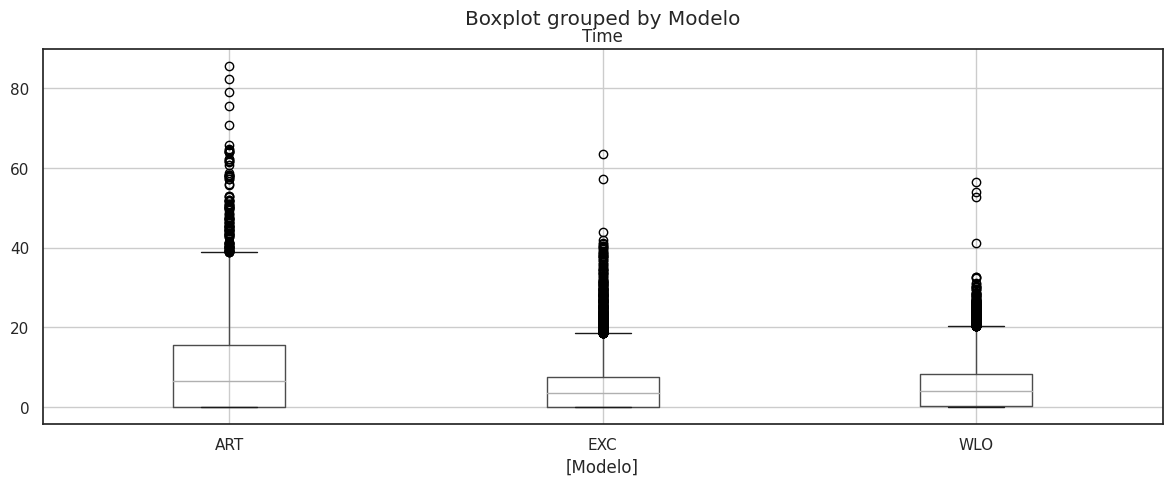

In [ ]:
sns.set(style='white', rc={'figure.figsize':(14,5)})

# Create boxplot by Modelo
table_final.boxplot(by='Modelo', return_type='axes')
     

Time    Axes(0.1,0.15;0.8x0.75)
dtype: object

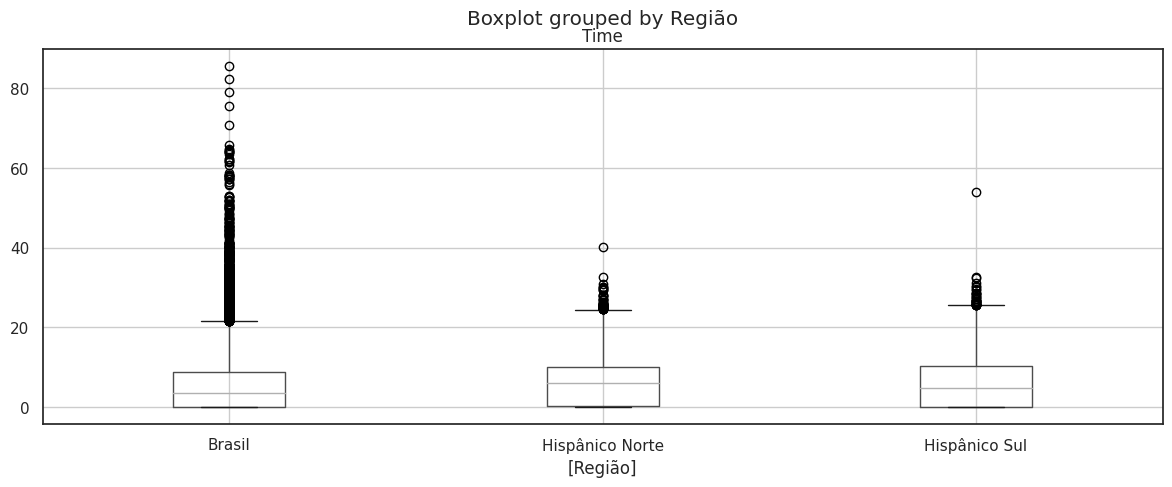

In [ ]:
sns.set(style='white', rc={'figure.figsize':(14,5)})

# Create boxplot by Região
table_final.boxplot(by='Região', return_type='axes')

Time    Axes(0.1,0.15;0.8x0.75)
dtype: object

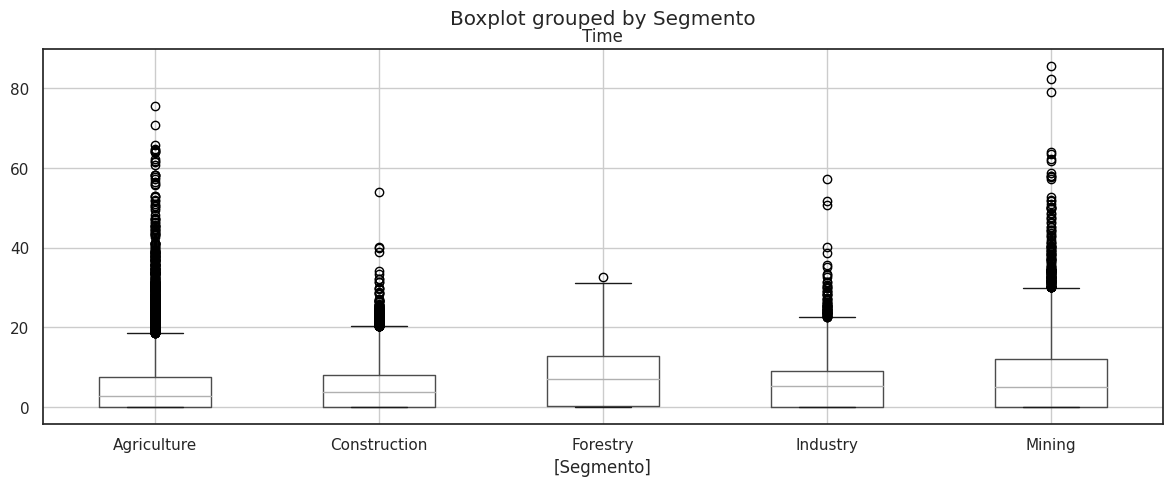

In [ ]:
sns.set(style='white', rc={'figure.figsize':(14,5)})

# Create boxplot by Segmento
table_final.boxplot(by='Segmento', return_type='axes')

Time    Axes(0.1,0.15;0.8x0.75)
dtype: object

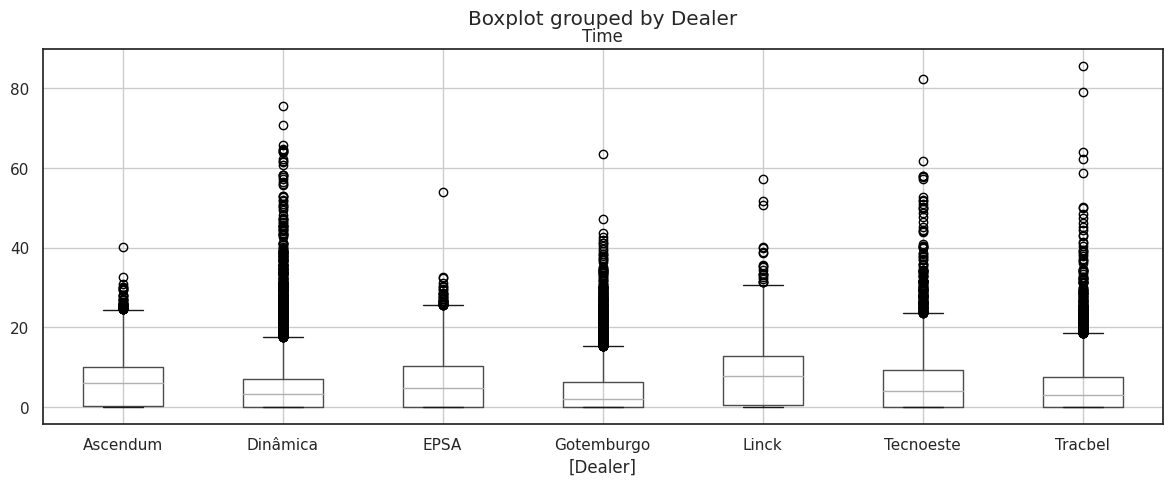

In [ ]:
sns.set(style='white', rc={'figure.figsize':(14,5)})

# Create boxplot by Dealer
table_final.boxplot(by='Dealer', return_type='axes')

Time    Axes(0.1,0.15;0.8x0.75)
dtype: object

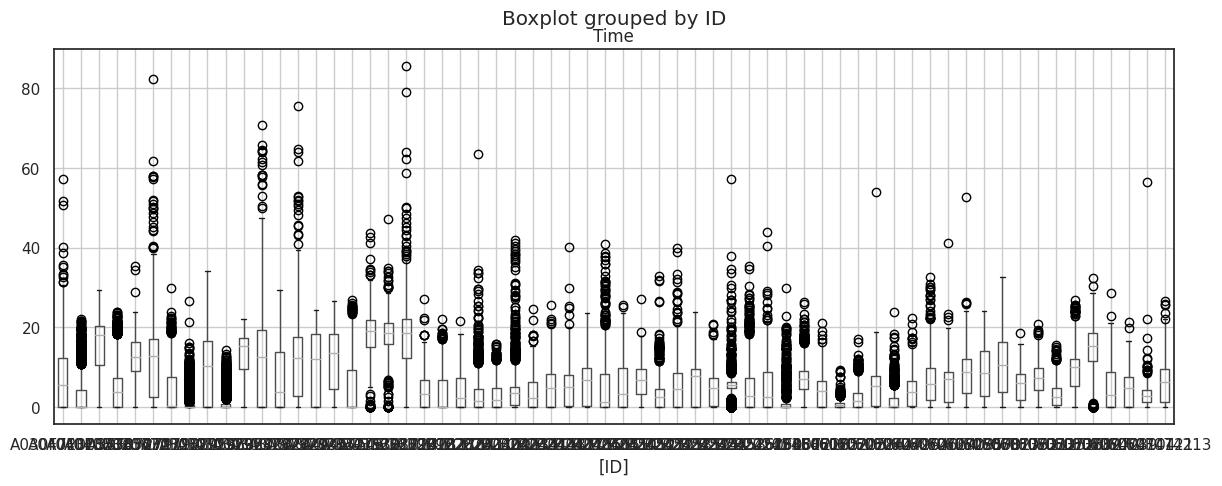

In [ ]:
sns.set(style='white', rc={'figure.figsize':(14,5)})

# Create boxplot by ID
table_final.boxplot(by='ID', return_type='axes')

# Observações / ideias 

* O que fazer com os casos com quantidade de hora trabalhada superior a 24hrs